## The Super Store dataset contains data for orders of a superstore in the US.

### Content
###### Ship Mode: Mode of shipping used for shipment delivery
###### Segment: (Categorical) Customer segment product was shipped to
###### Country: Country in which the shipment was delivered
###### City: City in which shipment was delivered
###### State: State in which the shipment was delivered
###### Postal Code: Postal code the shipment was delivered to
###### Region: Country region
###### Category: The category product belongs to
###### Sub-Category: Sub-category of the product
###### Sales: Sale made in USD
###### Quantity: Product quantity
###### Discount: Discount given on the product
###### Profit: Profit/loss made on the sale

# Import packages

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

# set the plots to display in the Jupyter notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

In [277]:
Superstore = pd.read_csv('SampleSuperstore.csv')

In [278]:
Superstore.head(10)  # dataframe for first 10 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [279]:
# count the rows and columns
Superstore.shape

(9994, 13)

# Data Cleaning

### Let's find and delete the duplicate row

In [280]:
Superstore.duplicated().sum()  

17

In [281]:
Superstore.drop_duplicates(inplace=True)  # drop the duplicate columns
Superstore.shape

(9977, 13)

### Let's delete some columns

In [282]:
Superstore = Superstore.drop('Postal Code',axis=1)
Superstore.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [283]:
Superstore = Superstore.drop('Country',axis=1)
Superstore.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Now I delete postal code and country columns because I'll analyze the data in the US only.

In [284]:
# identify the shape after dropping some column and rows (rows by columns)
Superstore.shape 

(9977, 11)

## Rename a column

In [285]:
Superstore.rename(columns={'Ship Mode':'ship_mode','Segment':'segment','City':'city','State':'state','Region':'region','Category':'category','Sub-Category':'sub_category','Sales':'sales','Quantity':'quantity','Discount':'discount','Profit':'profit'},inplace = True)

In [286]:
Superstore.columns

Index(['ship_mode', 'segment', 'city', 'state', 'region', 'category',
       'sub_category', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [287]:
Superstore.head()

,ship_mode,segment,city,state,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Rename a specific column

In [288]:
Superstore['segment'] = Superstore['segment'].replace({'Consumer':'Cons','Corporate':'Corp','Home Office':'HO'})  # or .map
Superstore.head()

,ship_mode,segment,city,state,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Cons,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Cons,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corp,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Cons,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Cons,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# What is the number of observations in the dataset?

# Checking information of data set.

In [289]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9977 non-null   object 
 1   segment       9977 non-null   object 
 2   city          9977 non-null   object 
 3   state         9977 non-null   object 
 4   region        9977 non-null   object 
 5   category      9977 non-null   object 
 6   sub_category  9977 non-null   object 
 7   sales         9977 non-null   float64
 8   quantity      9977 non-null   int64  
 9   discount      9977 non-null   float64
 10  profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


#### There is a 7 categorical data.

In [290]:
##Checking the Continuos and the Categorical Columns
pd.DataFrame(Superstore.dtypes, columns=['DataType'])

,DataType
ship_mode,object
segment,object
city,object
state,object
region,object
category,object
sub_category,object
sales,float64
quantity,int64
discount,float64


## Let's check if there is missing data

In [291]:
Superstore.isnull().head() # will tell True if there is missing data

,ship_mode,segment,city,state,region,category,sub_category,sales,quantity,discount,profit
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [292]:
Superstore.isnull().sum()

ship_mode       0
segment         0
city            0
state           0
region          0
category        0
sub_category    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

#### There is no missing data!

## Distribution of the data

In [293]:
Superstore.describe()  #Let's describe to get the useful values for each feature

,sales,quantity,discount,profit
count,9977.000000,9977.000000,9977.000000,9977.000000
mean,230.148801,3.790719,0.156278,28.689832
std,623.721432,2.226657,0.206455,234.457848
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.300000,2.000000,0.000000,1.726200
50%,54.816000,3.000000,0.200000,8.671000
75%,209.970000,5.000000,0.200000,29.372000
max,22638.480000,14.000000,0.800000,8399.976000


### Use the .agg() method with multiple arguments

In [294]:
Superstore.groupby('region')['sales'].agg(['count', 'mean', 'min', 'max'])  #find the mean, min and max of sales on region

,count,mean,min,max
region,,,,
Central,2319,215.947759,0.444,17499.950
East,2845,238.465798,0.852,11199.968
South,1620,241.803028,1.167,22638.480
West,3193,227.139254,0.990,13999.960


# Unique value in columns

In [295]:
# no. of unique entries
for columns in Superstore.columns:
    if Superstore[columns].dtype=='object':  #categorical
        print("Unique values in",columns + ":",Superstore[columns].nunique())

Unique values in ship_mode: 4
Unique values in segment: 3
Unique values in city: 531
Unique values in state: 49
Unique values in region: 4
Unique values in category: 3
Unique values in sub_category: 17


In [296]:
Superstore['category'].unique()  # categories of products were made for customers to order

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [297]:
Superstore['category'].value_counts() # how many products were ordered per category

Office Supplies    6012
Furniture          2118
Technology         1847
Name: category, dtype: int64

# How many items were ordered in total?

In [298]:
total_items_orders = Superstore['quantity'].sum()
total_items_orders

37820

# Grouping by Sub-Category

In [299]:
Superstore.groupby(['sub_category'])['sales'].mean()  #average of sales in subcategory

sub_category
Accessories     215.974604
Appliances      230.755710
Art              34.096896
Binders         133.645972
Bookcases       503.859633
Chairs          532.971969
Copiers        2198.941618
Envelopes        64.867724
Fasteners        13.936774
Furnishings      95.902745
Labels           34.283504
Machines       1645.553313
Paper            57.560075
Phones          371.211534
Storage         264.590553
Supplies        245.650200
Tables          648.791636
Name: sales, dtype: float64

<AxesSubplot:ylabel='sub_category'>

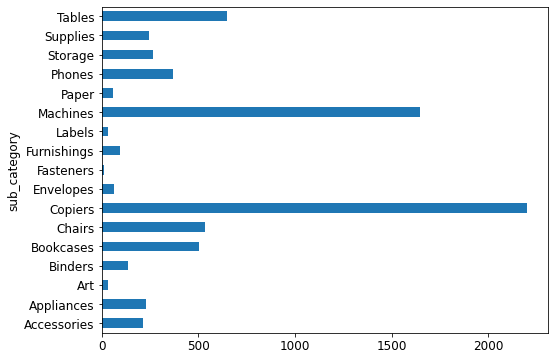

In [300]:
Superstore.groupby(['sub_category'])['sales'].mean().plot(kind='barh') #average

Average of items in sub_category sales. Copiers have the highest average sales.

# What was the most-ordered item and highest sales and profit in Category?

In [301]:
Superstore.groupby(['category']).sum().sort_values('quantity', ascending=False).head()

,sales,quantity,discount,profit
category,,,,
Office Supplies,718735.2440,22861,946.20,122364.6608
Furniture,741305.3133,8020,368.59,18421.8137
Technology,836154.0330,6939,244.40,145451.9773


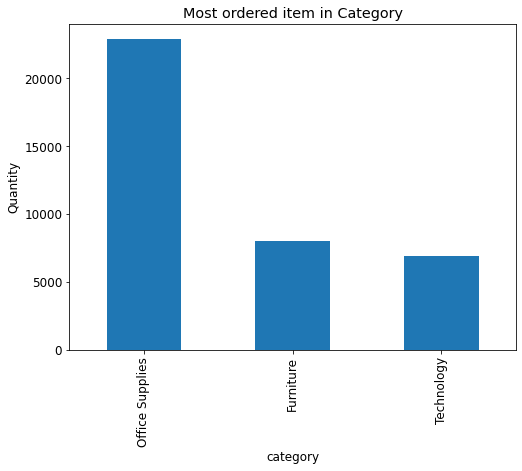

In [302]:
Superstore.groupby(['category'])['quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar');
plt.title('Most ordered item in Category')
plt.ylabel('Quantity');

## Checks the Profit and Sales

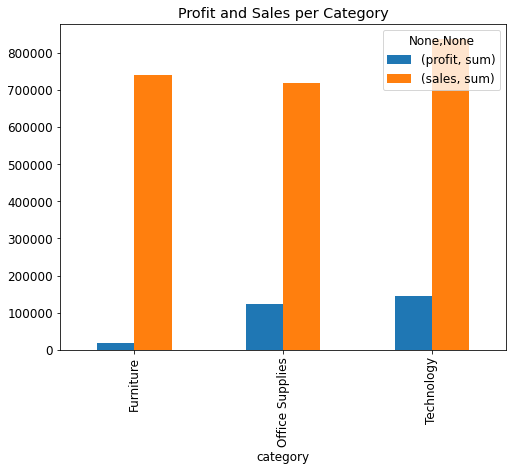

In [303]:
Superstore.groupby('category')['profit','sales'].agg(['sum']).plot.bar()
plt.title('Profit and Sales per Category')
plt.show()

#### Office supplies is the most ordered items in category but Technology have a highest sales and profit.

# What was the most ordered item and highest sales and profit in the Sub-Category? 

In [304]:
Superstore.groupby(['sub_category']).sum().sort_values('quantity', ascending=False).head(5)

,sales,quantity,discount,profit
sub_category,,,,
Binders,203409.169,5971,566.2,30228.0003
Paper,78224.142,5144,101.8,33944.2395
Furnishings,91683.024,3560,132.4,13052.7230
Phones,330007.054,3289,137.4,44513.7306
Storage,223843.608,3158,63.2,21278.8264


Text(0.5, 1.0, 'Most ordered item in SubCategory')

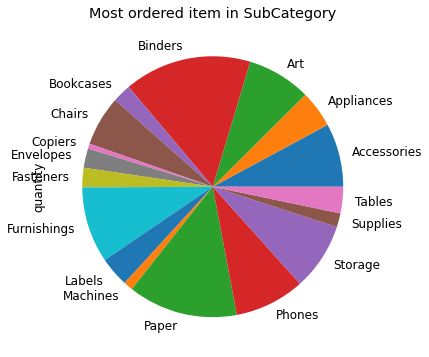

In [305]:
Superstore.groupby(['sub_category'])['quantity'].sum().plot(kind='pie');
plt.title('Most ordered item in SubCategory')

Text(0.5, 1.0, 'Profit and Sales per Sub-Category')

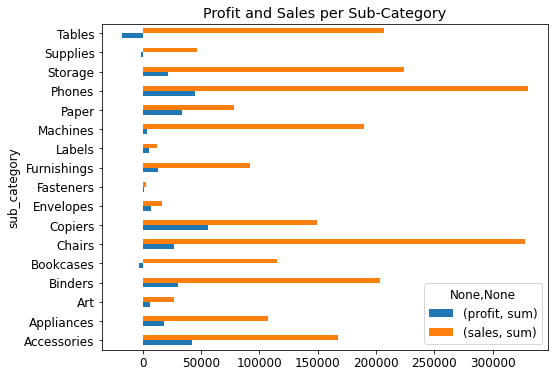

In [306]:
Superstore.groupby('sub_category')['profit','sales'].agg(['sum']).plot.barh()
plt.title('Profit and Sales per Sub-Category')

#### The most ordered item in SubCategory is Binders and Paper.  The highest sales is Phones and Chairs but Copiers makes a highest Profit. Also there are loss in Tables, Bookcases and Supplies.

## Region count from the Shipping Mode

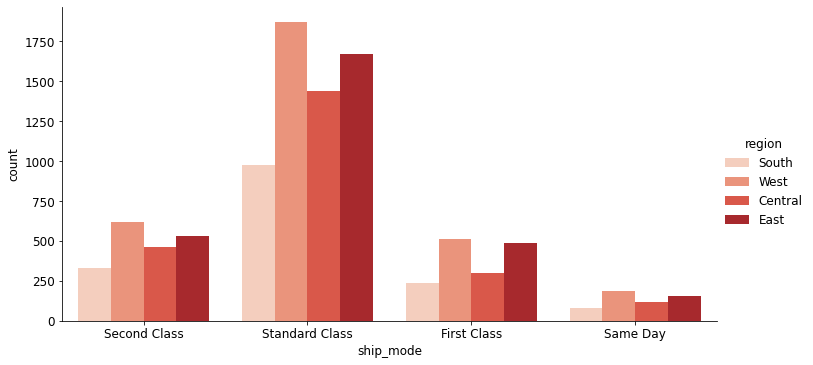

In [307]:
#Segment wise count of the ship modes
# to identify region mostly used which kind of ship mode
sns.catplot('ship_mode', hue='region', data=Superstore, kind='count',aspect=2.0,  palette='Reds')

#### Most of the region tend to use Standard class.

## Region and Sales

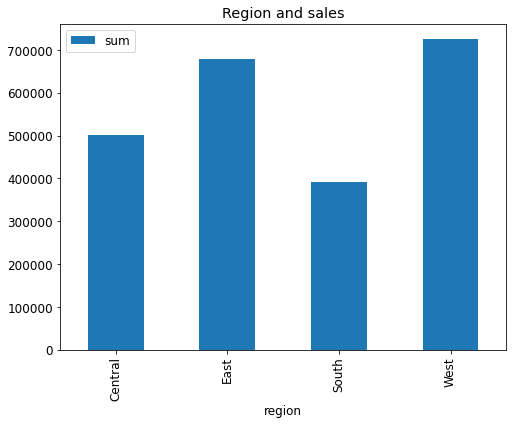

In [308]:
Superstore.groupby('region')['sales'].agg(['sum']).plot(kind='bar')
plt.title('Region and sales')
plt.show()

The West region is leading the sales followed by the East, South and North.

## Distribution of the Segment column

In [309]:
#find the highest sales quantity discount and profit in segment section
Superstore.groupby(['segment']).sum()  

,sales,quantity,discount,profit
segment,,,,
Cons,1.160832e+06,19497,820.51,134004.4705
Corp,7.060701e+05,11591,476.85,91954.9798
HO,4.292927e+05,6732,261.83,60279.0015


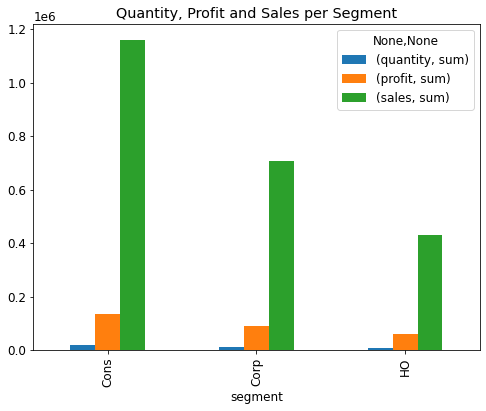

In [310]:
Superstore.groupby('segment')['quantity','profit','sales'].agg(['sum']).plot.bar()
plt.title('Quantity, Profit and Sales per Segment')
plt.show()

#### Consumer is leading.

# Separate the SubCategory into Category

In [311]:
Superstore['category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: category, dtype: int64

In [312]:
tech_prod=Superstore[(Superstore['category']=='Technology')]
tech_prod.head()

,ship_mode,segment,city,state,region,category,sub_category,sales,quantity,discount,profit
7,Standard Class,Cons,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Cons,Los Angeles,California,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Cons,San Francisco,California,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Cons,Los Angeles,California,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corp,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737


In [313]:
furn_prod=Superstore[(Superstore['category']=='Furniture')]
furn_prod.head()

,ship_mode,segment,city,state,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Cons,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Cons,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Cons,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Cons,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
10,Standard Class,Cons,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092


In [314]:
office_prod=Superstore[(Superstore['category']=='Office Supplies')]
office_prod.head()

,ship_mode,segment,city,state,region,category,sub_category,sales,quantity,discount,profit
2,Second Class,Corp,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Cons,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Cons,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Cons,Los Angeles,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Cons,Los Angeles,California,West,Office Supplies,Appliances,114.900,5,0.0,34.4700


## Identify which Sub-Category has the most discount

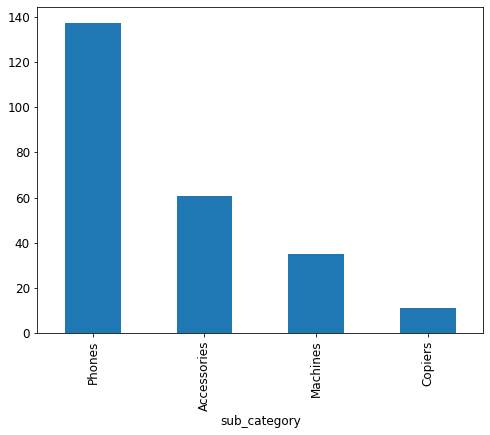

In [315]:
tech_prod.groupby(['sub_category'])['discount'].sum().sort_values(ascending=False).head().plot(kind='bar');

For Technology(Category), phones have a highest discount and it is also highest in profit and sales as shown in graph profit and sales above.

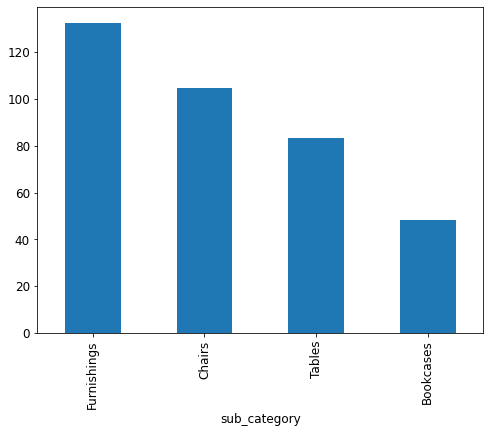

In [316]:
furn_prod.groupby(['sub_category'])['discount'].sum().sort_values(ascending=False).head().plot(kind='bar');

For Furniture(Category), there are more discount on furnishings followed by chairs.

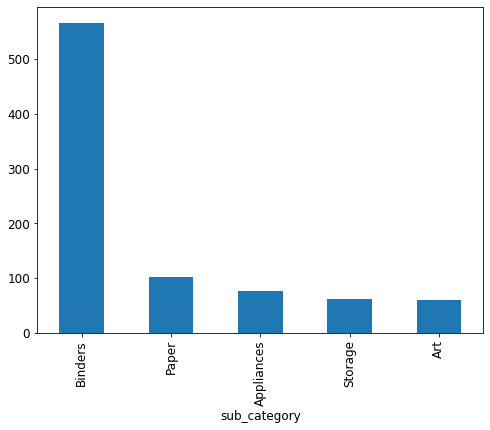

In [317]:
office_prod.groupby(['sub_category'])['discount'].sum().sort_values(ascending=False).head().plot(kind='bar');

For Office Supplies(Category), it is clearly biased on binders.

### Creating the Scatter Plot

In [252]:
Superstore = pd.DataFrame(np.random.randn(1000, 4), columns=['sales', 'quantity','discount', 'profit'])

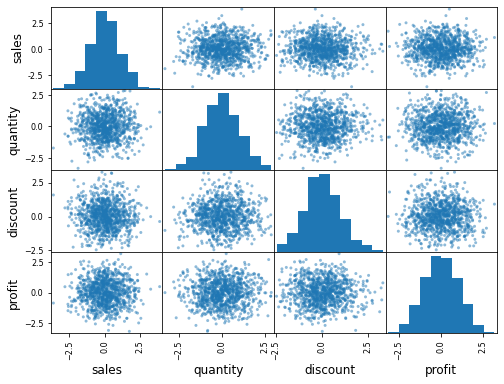

In [253]:
scatter_matrix(Superstore);

There are no such strong linear relations between Dataset columns here. Only irregularities can be found everywhere.

### User Input For Discount 

In [167]:
def get_discount():
    print("Discount.")
    quantity_buy = float(input("Enter your product quantity bought: "))
    
    if(quantity_buy >= 5):
        print("You got 10% discount")
        print("Thank you for shopping here !")
    elif(quantity_buy >= 3):
        print("You got 5% discount")
        print("Bought more to experience more discount !")
    else:
        print("Thank you for shopping here")
        print("Your item will be delivered soon")    

In [168]:
get_discount()

Discount.
Enter your product quantity bought: 6
You got 10% discount
Thank you for shopping here !


In [186]:
Superstore.set_index('ship_mode',inplace=True) # set ship mode as index

In [187]:
Superstore.head()

,segment,city,state,region,category,sub_category,sales,quantity,discount,profit
ship_mode,,,,,,,,,,
Second Class,Cons,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,130.98
Second Class,Cons,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,243.98
Second Class,Corp,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,7.31
Standard Class,Cons,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,191.52
Standard Class,Cons,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,11.18


### Defining a  functions that return values for database searches based on ship mode and segment.

In [231]:
# Searching ship mode buyer on DataFrame
def get_shipmode(ship_mode):
    return Superstore[Superstore.index == ship_mode] # ship mode have been replaced as index

# type of segment buyer
def segment_type():
    print(f"There are {Superstore['segment'].nunique()} types of segment, which are {Superstore['segment'].unique()}")
    
category = ['ship mode:1','segment type:2']
print(f"There are the categories for user input:\n{category}\n")

while True:
    try:
        user = input("Enter search category: ")
        if (user == '') or (user == ' '):
            break
        else:
            user = int(user)
            if user == 1:
                ship_mode = input("Enter ship mode: ")
                print(get_shipmode(ship_mode))
            elif user == 3:
                segment_type()
            else:
                print("There is no such category no.")
                
    except Exception as ex:
        print("Sorry! That is an error: {} with exception: {}".format(type(ex).__name__,ex.args))
        continue

There are the categories for user input:
['ship mode:1', 'segment type:2']

Enter search category: 1
Enter ship mode: Second Class
             segment           city       state region         category  \
ship_mode                                                                 
Second Class    Cons      Henderson    Kentucky  South        Furniture   
Second Class    Cons      Henderson    Kentucky  South        Furniture   
Second Class    Corp    Los Angeles  California   West  Office Supplies   
Second Class    Cons    West Jordan        Utah   West  Office Supplies   
Second Class    Cons  San Francisco  California   West  Office Supplies   
...              ...            ...         ...    ...              ...   
Second Class    Corp         Newark    Delaware   East  Office Supplies   
Second Class    Corp         Newark    Delaware   East  Office Supplies   
Second Class    Cons      Lafayette   Louisiana  South        Furniture   
Second Class    Cons          Miami     Flor

##### To find the user by ship mode